<style>
.output_png!important {
    display: table-cell;
    text-align: right;
    vertical-align: middle;
}
</style>

<script>
    var code_show=true; //true -> hide code at first

    function code_toggle() {
        $('div.prompt').hide(); // always hide prompt
        $('div[style*="border-style: dashed"]').hide(); // hide extra comments, usually log from treasuredata
        $('div.output_stderr').parent().hide();

        if (code_show){
            $('div.input').hide();
        } else {
            $('div.input').show();
        }
        code_show = !code_show
    }
    $( document ).ready(code_toggle);
</script>

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 7)
sns.set_context('poster')

# Scatterplot

We will be using iris dataset to play around scatterplot

In [7]:
iris = sns.load_dataset('iris')

In [8]:
unique_species = iris.species.unique()
unique_species.sort()
species_to_id = {species: idx for idx, species in enumerate(unique_species)}

In [9]:
iris['species_id'] = iris.species.apply(lambda s: species_to_id.get(s))

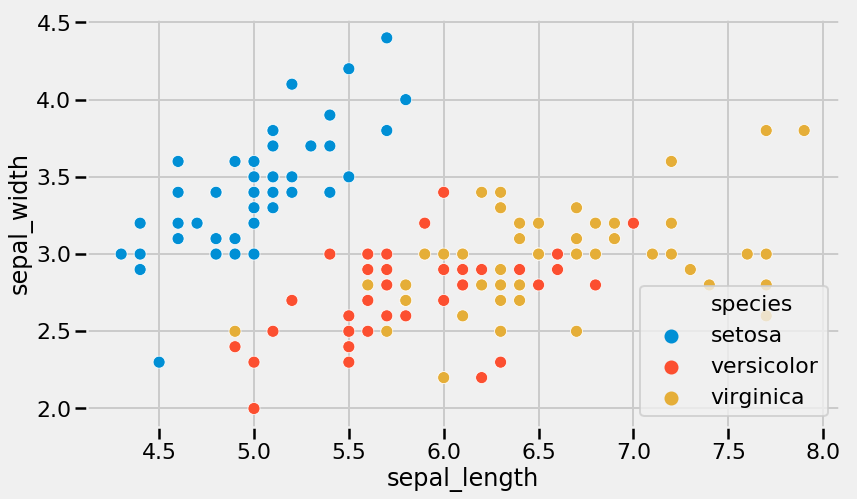

In [10]:
sns.scatterplot(
    iris.sepal_length,
    iris.sepal_width,
    hue=iris.species
)
plt.show()

## Your Goal

We are interested with "Setosa" species, now we should make our users understand with 1 time look into our graph. Since our graph contains so many information and distraction, while we wanted to put attention to "sentosa" only, then we need to remove clutters in our graph.


## Removing Clutters
Step by Steps:
### 1. Simplify Category
```
iris['is_setosa'] = iris.species.apply(lambda x: x if x == 'setosa' else 'not setosa')
```
### 2. Remove Gridlines
```
plt.grid(None)
```
### 3. Change Axis color to gray
```
plt.xlabel('Sepal Length', color='gray')
plt.ylabel('Petal Length', color='gray')
plt.tick_params(axis='x', colors='gray')
plt.tick_params(axis='y', colors='gray')
```
### 4. Use Supertitle and Title Wisely
```
plt.suptitle('Setosa has Narrower Petal Than Others')
plt.title('Relation Between Petal Length And Sepal Length', color='grey', fontsize=14)
```

### 5. Move Legend outside of graph
```
plt.legend(loc='lower center', bbox_to_anchor=[.5,-.3], ncol=4, fontsize=15)
```

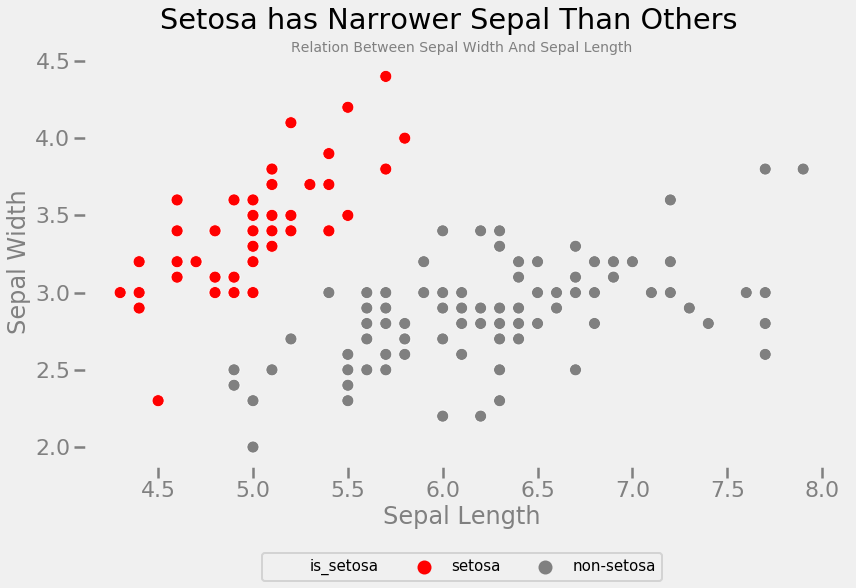

In [64]:
## your codes here
iris['is_setosa'] = iris['species'].apply(lambda x: 'setosa' if (x == 'setosa') else 'non-setosa')

sns.set_palette(['red','gray'])

sns.scatterplot(
    data=iris,
    x='sepal_length',
    y='sepal_width',
    hue='is_setosa'
)

plt.grid(None)
plt.xlabel('Sepal Length', color='gray')
plt.ylabel('Sepal Width', color='gray')
plt.tick_params(axis='x', colors='gray')
plt.tick_params(axis='y', colors='gray')

plt.legend(loc='lower center',
           bbox_to_anchor=[.5,-.3],
           ncol=4,
           fontsize=15
          )

plt.title('Relation Between Sepal Width And Sepal Length', color='grey', fontsize=14)
plt.suptitle('Setosa has Narrower Sepal Than Others')
plt.show();

## Your Turn!

We still interested in "setosa" and try to show that setosa has the smallest petal over all Irises. Remove the clutters and try to tell the story without even using words in markdown!

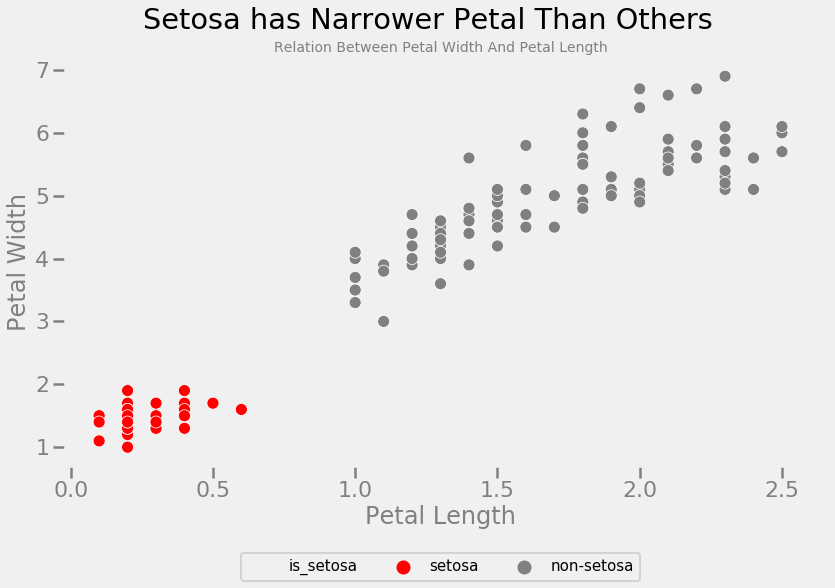

In [68]:
sns.scatterplot(
    iris.petal_width,
    iris.petal_length,
    hue=iris.is_setosa
)

plt.grid(None)
plt.xlabel('Petal Length', color='gray')
plt.ylabel('Petal Width', color='gray')
plt.tick_params(axis='x', colors='gray')
plt.tick_params(axis='y', colors='gray')

plt.legend(loc='lower center',
           bbox_to_anchor=[.5,-.3],
           ncol=4,
           fontsize=15
          )

plt.title('Relation Between Petal Width And Petal Length', color='grey', fontsize=14)
plt.suptitle('Setosa has Narrower Petal Than Others')
plt.show();

# Lineplot

We will be using shampoo sales dataset$^{3}$ 

In [322]:
shampoo = pd.read_csv(
    'https://raw.githubusercontent.com/blue-yonder/pydse/master/pydse/data/sales-of-shampoo-over-a-three-ye.csv'
    , delimiter=';'
)

In [323]:
shampoo.head()

,Month,Sales
0,01-01,266.0
1,01-02,145.9
2,01-03,183.1
3,01-04,119.3
4,01-05,180.3


The month is in format "yy-mm" lets first append "20" to the month and make it pandas datetime

In [324]:
## your code here
shampoo['dt'] = pd.to_datetime(shampoo['Month'], format='%y-%m')
# shampoo['dt'] = shampoo['Month'].apply(lambda x: pd.to_datetime('20'+x))

now draw your timeseries trend 

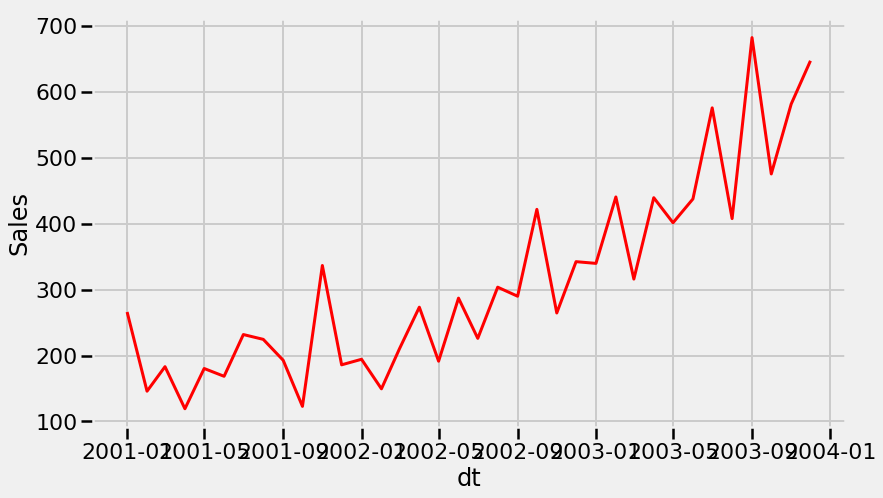

In [326]:
sns.lineplot(
    x='dt',
    y='Sales',
    data=shampoo
)
plt.show();

## Your Goal
What can you see from above graph?
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

you might guess it right! You can see:

1. There's certain months that the sales peaked
2. There's increasing trends
3. You could make a forecast! (Bonus)

## Removing The Clutter Again!

Tasks, similar to previously mentioned:
### 1. Remove Gridlines
### 2. Change Axis color to gray, and labels to be more simple
```
import matplotlib.dates as mdates
....
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%y'))
```
### 3. Use Supertitle and Title Wisely
### 4. Calculate Moving Average as "Trend"
```
df.set_index()
df[column].rolling(rolling_period).mean()
```
### 5. Highlight Forecast
```
plt.axvspan(
    min,
    max,
    alpha=...,
    color=...
)
```
### 6. Highlight Peaks / Other Interesting Trends
```
plt.annotate(
    text,
    xypoint,
    xytext,
    ha='center',
    va='center',
    ...
)
```


In [327]:
shampoo = shampoo.set_index('dt', drop=False)
peaks = shampoo.groupby(pd.Grouper(freq='Y')).idxmax()['Sales']

In [328]:
import matplotlib.dates as mdates

In [329]:
from sklearn.linear_model import LinearRegression

In [331]:
## prepare forecast period
forecast_month = pd.date_range(
    start='2004-01-01',
    periods=12,
    freq='M'
)

df_forecast = pd.DataFrame({
    'dt':forecast_month,
    'Month':forecast_month,
    'Sales':np.zeros(12),
    'ma_sales':np.zeros(12)
}).sort_values(by='dt')

df_forecast['Month'] = df_forecast['dt'].dt.to_period('M').astype(str) + '-01'
df_forecast['dt'] = df_forecast['Month']

df_forecast = df_forecast.set_index('Month', drop=False)

shampoo = shampoo.append(df_forecast, sort=False)
shampoo['dt'] = pd.to_datetime(shampoo['dt'])

In [350]:
# forecast data

from statsmodels.tsa.holtwinters import ExponentialSmoothing

expon = ExponentialSmoothing(shampoo.loc[(shampoo['Sales'] != 0),'Sales'],
                             seasonal='additive',
                             seasonal_periods=6,
                             trend='additive'
                            ).fit()

pred = expon.predict(
    start=shampoo.loc[(shampoo['Sales'] == 0)].index[0],
    end=shampoo.loc[(shampoo['Sales'] == 0)].index[-1]
)

/home/elvynatunggawan/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


/home/elvynatunggawan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:63: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


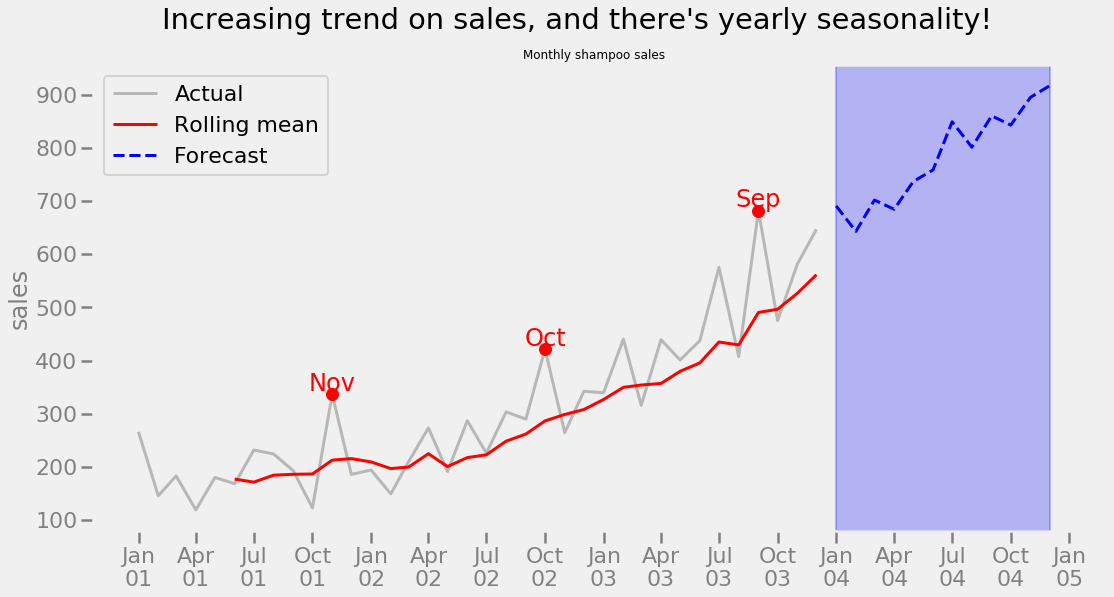

In [415]:
## codes here
shampoo['ma_sales'] = shampoo.rolling(window=6)['Sales'].mean()

f, ax = plt.subplots(figsize=(16,8))

sns.lineplot(
    x='dt',
    y='Sales',
    data=shampoo.loc[(shampoo['Sales'] != 0)],
    ax=ax,
    color='gray',
    label='Actual',
    alpha=0.5
)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%y'))

sns.lineplot(
    data=shampoo.loc[(shampoo['Sales'] != 0)],
    x='dt',
    y='ma_sales',
    ax=ax,
    color='red',
    label='Rolling mean'
)

# draw points on peak sales in each year
for p in peaks:
    row = shampoo.loc[p]
    plt.plot(
        row['dt'],
        row['Sales'],
        marker='o',
        color='red'
    )
    plt.annotate(
        p.strftime('%b'),
        (row['dt'], row['Sales']),
        (row['dt'], row['Sales']+20),
        color='red',
        ha='center',
        va='center'
    )

# # plot forecast
plt.plot(
    pd.to_datetime(shampoo.loc[(shampoo['Sales'] == 0), 'dt']),
    pred,
    label='Forecast',
    color='blue',
    linestyle='--'
)

plt.axvspan(
    shampoo.loc[(shampoo['Sales'] == 0), 'dt'].index[0],
    shampoo.loc[(shampoo['Sales'] == 0), 'dt'].index[-1],
    alpha=0.25,
    color='blue'
)

## plot peak of forecast
peak_forecast = pred.argmax()
## to do


plt.grid(None)

plt.suptitle("Increasing trend on sales, and there's yearly seasonality!")
plt.title("Monthly shampoo sales", fontsize=12, loc='center')

plt.xlabel('', color='gray')
plt.ylabel('sales', color='gray')

plt.tick_params(axis='x', colors='gray')
plt.tick_params(axis='y', colors='gray')

plt.legend(
    loc='best'
)

plt.show();

# More Cases!


## Additional Case: 
What's Wrong With this Visualization?

![wtf-1](https://66.media.tumblr.com/400cc2aa15bba1403ec5bcf0a8cbb4cb/tumblr_pkirodB1961sgh0voo1_1280.jpg)



In [352]:
case1_data = pd.DataFrame({
    'country': ['Hong Kong', 'Lebanon', 'Japan', 'Ireland', 'South Korea'],
    'pct_electric_comes_from_abroad': [99, 98, 93, 86, 81]
})

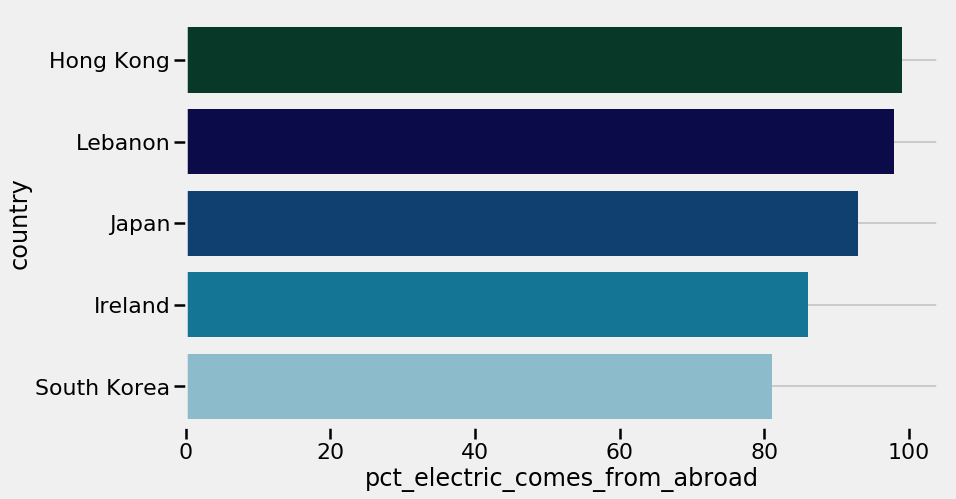

In [418]:
sns.barplot(
    data=case1_data,
    y='country',
    x='pct_electric_comes_from_abroad',
    orient='h',
    palette='ocean',
    ci=False
)

plt.grid(None)
plt.title('')
plt.show();

# References

[1] https://medium.com/@andykashyap/top-5-tricks-to-make-plots-look-better-9f6e687c1e08

[2] https://python-graph-gallery.com/190-custom-matplotlib-title/

[3] https://raw.githubusercontent.com/blue-yonder/pydse/master/pydse/data/sales-of-shampoo-over-a-three-ye.csv

[4] https://stackoverflow.com/questions/35339139/where-is-the-documentation-on-pandas-freq-tags

[5] https://pythonmatplotlibtips.blogspot.com/2018/01/add-second-x-axis-below-first-x-axis-python-matplotlib-pyplot.html